* Name: `dissipation-theory--Study-18.ipynb`
* Author: John A. Marohn
* Date: 2024-05-31
* Continued from: `dissipation-theory--Study-17.ipynb`
* Continued to: ---
* Summary: Test drive the new LDS code.

# Preliminaries

In [1]:
from dissipationtheory.constants import ureg
from dissipationtheory.dissipation import blds_perpendicular_jit, lds_perpendicular_jit
from dissipationtheory.dissipation import CantileverModelJit, SampleModel1Jit
from dissipationtheory.dissipation import theta1norm_jit
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 3.25, 3.5

In [3]:
THIS = 'dissipation-theory--Study-18--'

# Calculate BLDS and LDS spectrum for a representative sample

In [21]:
sample1_jit = SampleModel1Jit(
    cantilever = CantileverModelJit(
        f_c = 75e3, 
        V_ts = 1.0,
        R = 30e-9,  
        d = 200e-9), # 120 + 100/2 = 170  ; "100 to 200 nm pp"
    h_s = 500e-9, 
    epsilon_s = complex(3.4, 0),
    mu = 1e-10,
    rho = 1e23,
    epsilon_d = complex(1e6, 0),
    z_r = 300e-9
)

An array of modulation frequencies.

In [27]:
omega_m = ureg.Quantity(np.logspace(start=np.log10(1e2), stop=np.log10(3e6), num=50), 'Hz')

In the code below, `X` and `Y` is the in-phase and out-of-phase LDS frequency shift, respectively, while `Z` is the BLDS frequency shift.

In [62]:
X = ureg.Quantity(np.zeros_like(omega_m), 'Hz')
Y = ureg.Quantity(np.zeros_like(omega_m), 'Hz')
Z = ureg.Quantity(np.zeros_like(omega_m), 'Hz')

for index, omega_ in enumerate(omega_m):
    (X[index], Y[index]) = lds_perpendicular_jit(theta1norm_jit, sample1_jit, omega_)
    Z[index] = blds_perpendicular_jit(theta1norm_jit, sample1_jit, omega_)

Plot the shifts versus modulation frequency and save the figure.

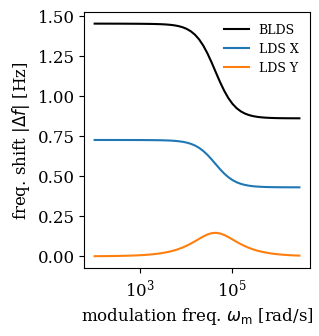

In [61]:
plt.semilogx(omega_m.to('Hz').magnitude, abs(Z.to('Hz').magnitude), 'k-', label='BLDS')
plt.semilogx(omega_m.to('Hz').magnitude, abs(X.to('Hz').magnitude), '-', label='LDS X')
plt.semilogx(omega_m.to('Hz').magnitude, abs(Y.to('Hz').magnitude), '-', label='LDS Y')
plt.xlabel('modulation freq. $\omega_{\mathrm{m}}$ [rad/s]')
plt.ylabel('freq. shift |$\Delta f$| [Hz]')
plt.legend(fontsize=9, frameon=False, loc=1)
plt.tight_layout()
plt.savefig(THIS + 'Fig-01.pdf')
plt.savefig(THIS + 'Fig-01.png', dpi=300)
plt.show()